### Importing library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
import tensorflow as tf
from sklearn.metrics import mean_squared_error

### y = 5x^3-8x^2-7x+1

In [ ]:
def y_value_calc(x):
  return 5 * x**3 - 8 * x**2 - 7 * x + 1

### Creating Dataset

In [ ]:
def value_generate(data):
  x = np.random.randint(-20, 20, data, dtype=int)
  y = y_value_calc(x)
  return x, y

# Normalize function for data between [-1,1]

In [ ]:
def normalize(values):
  maximum = np.max(values)
  minimum = np.min(values)

  return (2 * (values - minimum) / (maximum - minimum)) - 1

### Building the Model

In [ ]:
def dnn_model():
  inputs = Input((1,))
  hidden_layer1 = Dense(32, activation='relu')(inputs)
  hidden_layer2 = Dense(64, activation='relu')(hidden_layer1)
  hidden_layer3 = Dense(128, activation='relu')(hidden_layer2)

  outputs = Dense(1, name = 'Output_Layer')(hidden_layer3)

  model = Model(inputs, outputs, name = 'DNN_Model')
  return model

### Creating training, validation and test split

In [ ]:
x, y = value_generate(10000)

# Performing Normalization
x_data = normalize(x)
y_data = normalize(y)


data_length = len(x_data)
# Train
x_train, y_train = x_data[:int(data_length*0.9)], y_data[:int(data_length*0.9)]
#Validation
x_validation, y_validation = x_data[int(data_length*0.90):int(data_length*0.95)], y_data[int(data_length*0.90):int(data_length*0.95)]
# Test
x_test, y_test = x_data[int(data_length*.95):], y_data[int(data_length*0.95):]


### Model Train

In [ ]:
model = dnn_model()
model.summary()
# Compile the model and train
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss='mean_squared_error',metrics=[metrics.R2Score(name='accuracy')])
fitted_model = model.fit(x_train, y_train, epochs=10, validation_data=(x_validation, y_validation))

history = fitted_model.history


Model: "DNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7824 - loss: 0.0364 - val_accuracy: 0.9968 - val_loss: 6.0588e-04
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9987 - loss: 2.1946e-04 - val_accuracy: 0.9997 - val_loss: 6.4519e-05
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9998 - loss: 3.9538e-05 - val_accuracy: 0.9998 - val_loss: 4.0417e-05
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 1.8982e-05 - val_accuracy: 0.9999 - val_loss: 1.9556e-05
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 1.0577e-05 - val_accuracy: 0.9999 - val_loss: 1.5369e-05
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 1.9932e-05 - val_accuracy: 0.9999 - val_loss: 1.0270e-05
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 6.3886e-06 - val_accuracy: 0.9997 - val_loss: 5.8002e-05
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
history

{'accuracy': [0.9265839457511902,
  0.9991777539253235,
  0.9998026490211487,
  0.9999132752418518,
  0.9999434351921082,
  0.9998960494995117,
  0.9999384880065918,
  0.9999035000801086,
  0.9998879432678223,
  0.999915599822998],
 'loss': [0.012240716256201267,
  0.0001370958489133045,
  3.29008289554622e-05,
  1.4458336409006733e-05,
  9.432332262804266e-06,
  1.7329044567304663e-05,
  1.0254355402139481e-05,
  1.608734055480454e-05,
  1.8687673218664713e-05,
  1.4067840311327018e-05],
 'val_accuracy': [0.9968000650405884,
  0.9996592402458191,
  0.9997865557670593,
  0.9998967051506042,
  0.9999188184738159,
  0.9999457597732544,
  0.9996936917304993,
  0.999992311000824,
  0.9996123313903809,
  0.9999243021011353],
 'val_loss': [0.0006058813887648284,
  6.451896479120478e-05,
  4.041747160954401e-05,
  1.9556062397896312e-05,
  1.5369370885309763e-05,
  1.0270286111335736e-05,
  5.8001616707770154e-05,
  1.4520534250550554e-06,
  7.34071436454542e-05,
  1.4338393157231621e-05]}

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9999 - loss: 1.3064e-05 
Test Loss: 1.4370424651133362e-05
Test Accuracy: 0.9999229907989502
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


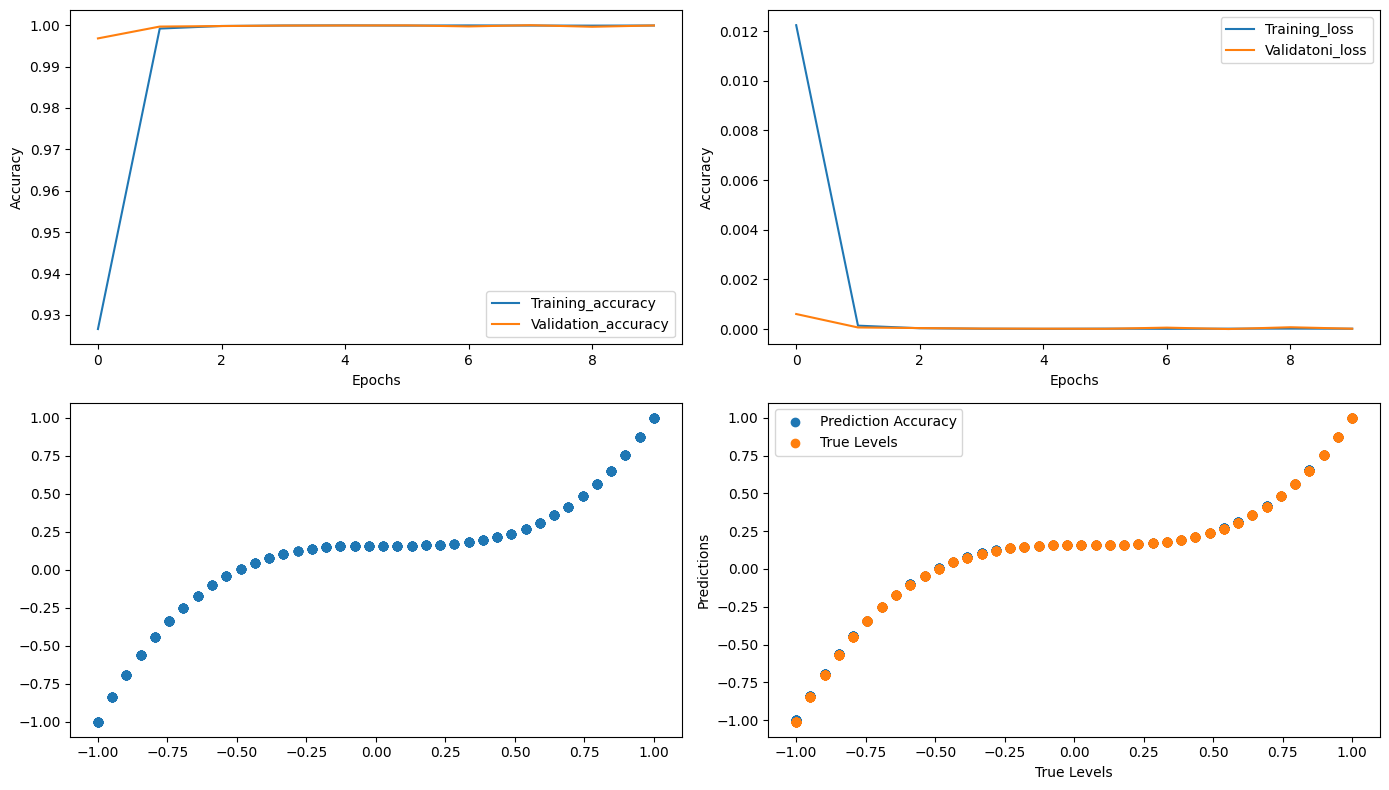

In [ ]:
plt.figure(figsize=(14,8))

# Plot Training and Validation Accuracy
plt.subplot(2,2,1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_accuracy', 'Validation_accuracy'])

# Plot Training and Validation Loss
plt.subplot(2,2,2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_loss', 'Validatoni_loss'])

plt.subplot(2,2,3)
plt.scatter(x_test,y_test)

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict on test data
predictions = model.predict(x_test)

# Plot prediction accuracy vs true levels
plt.subplot(2,2,4)
plt.scatter(x_test,y_test)
plt.scatter(x_test, predictions)
plt.ylabel('Predictions')
plt.xlabel('True Levels')
plt.legend(['Prediction Accuracy', 'True Levels'])


plt.tight_layout()
plt.show()